In [ ]:
#graph every thing on one graph 


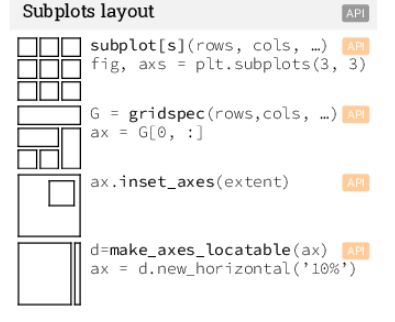

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

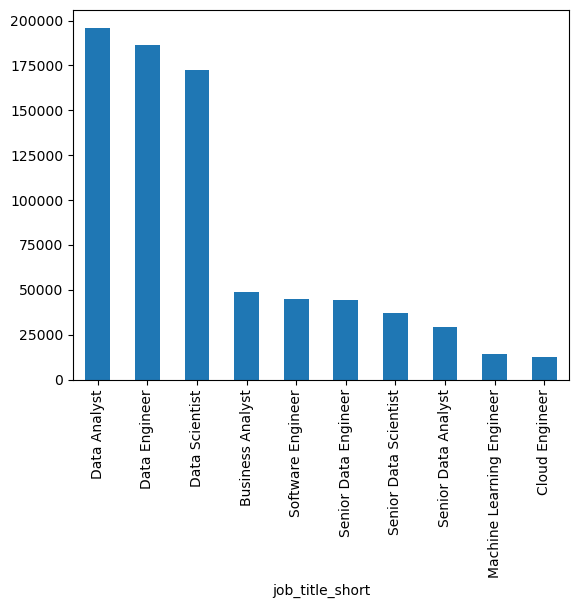

In [6]:
# create a simple subplot
fig, ax = plt.subplots()

# plot the data
df['job_title_short'].value_counts().plot(kind='bar', ax=ax) # counts te values in job_title_short passes as ax
plt.show()

In [7]:
#adding two plots schedual and job types

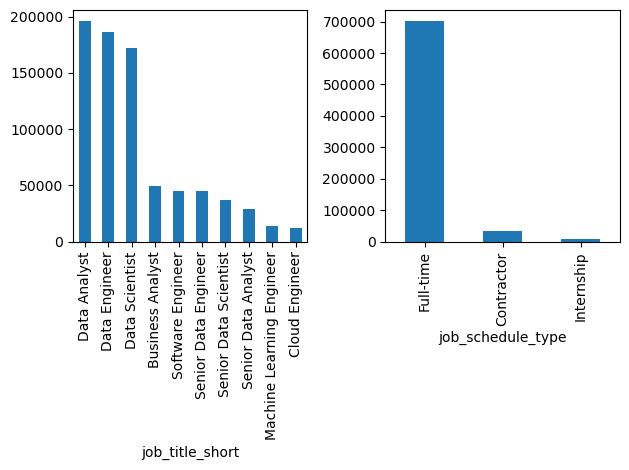

In [8]:
fig, ax = plt.subplots(1, 2) # 1 row 2 columns 

df['job_title_short'].value_counts().plot(kind='bar', ax=ax[0])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[1]) #specify index of ax so 1 for second one 

# fix the overlap
fig.tight_layout() 

plt.show() #This is the Pandas method of vizualisation 

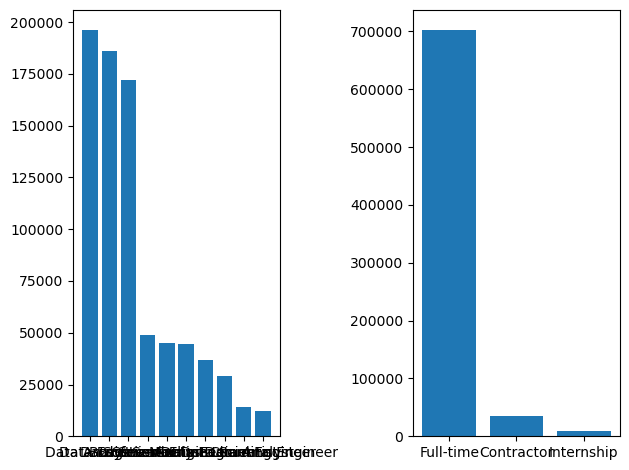

In [9]:
#Alternatively, we can plot how Matplotlib intended. basically the same better on Pandas 
fig, ax = plt.subplots(1, 2)

ax[0].bar(df['job_title_short'].value_counts().index, df['job_title_short'].value_counts())
ax[1].bar(df['job_schedule_type'].value_counts().head(3).index, df['job_schedule_type'].value_counts().head(3))

fig.tight_layout()

plt.show()

# Example - Counts of Top Skills in Job Postings 

In [10]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


In [13]:
# get the top 3 job titles and give them a variable add them to a list ordered by count 
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = job_titles[:3]

job_titles

['Data Scientist', 'Data Engineer', 'Data Analyst']

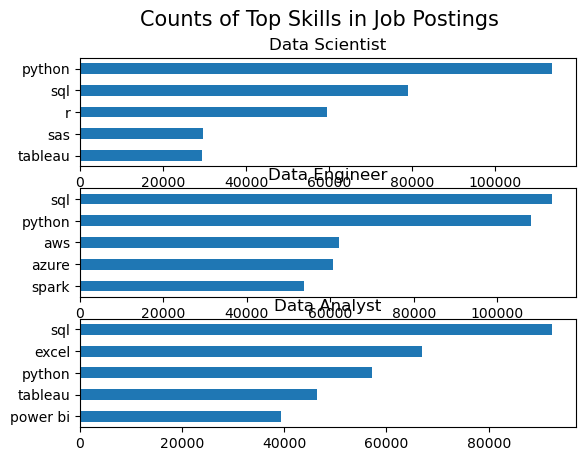

In [15]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
plt.show()

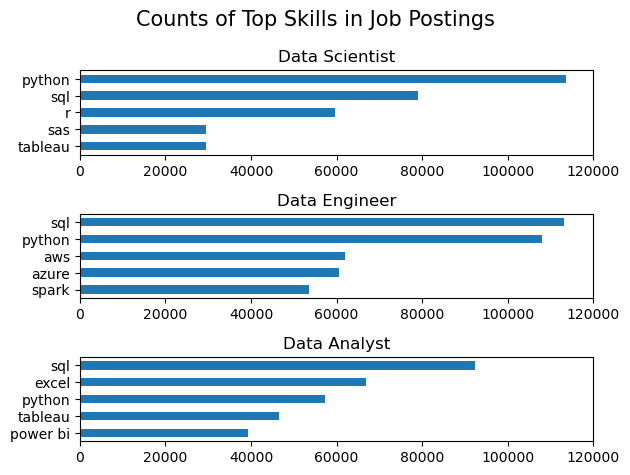

In [16]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):#enumerate through a list first index then job_titile 
    df_skills_count[df_skills_count['job_title_short'] == job_title].head(5).plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis() # makes python go on top 
    ax[i].set_ylabel('')
    ax[i].get_legend().remove() # removes legend 
    ax[i].set_xlim(0, 120000) # make the scales the same

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15) #gives main title (suptitle)
fig.tight_layout() # fix the overlap
plt.show()

# Generating Plots for Video Intro 

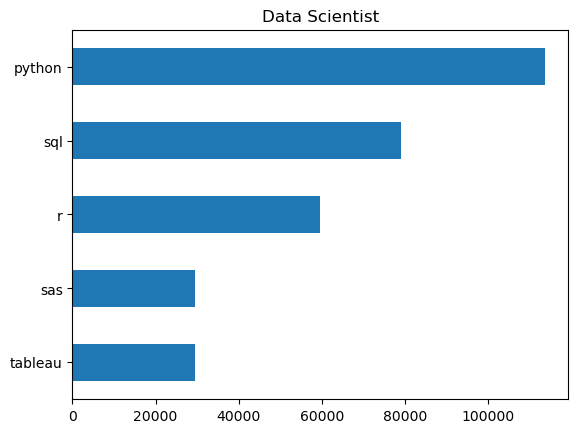

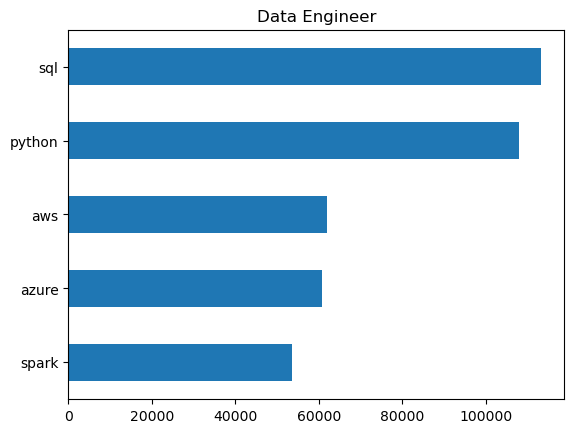

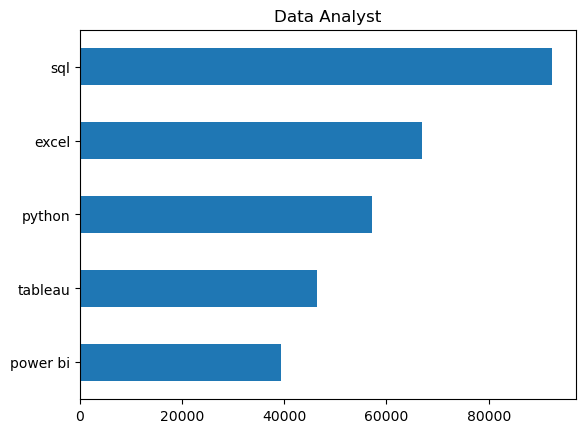

In [17]:
for i, job_title in enumerate(job_titles):
    df_skills_count[df_skills_count['job_title_short'] == job_title].head(5).plot(kind='barh', x='job_skills', y='skill_count', title=job_title)
    plt.gca().invert_yaxis()
    plt.gca().set_ylabel('')
    plt.gca().get_legend().remove()
    plt.show()